# Gradient Descent (GD) and Stochastic Gradient Descent (SGD)

Optimization is at the heart of **machine learning, deep learning, and reinforcement learning**.  
Two fundamental optimization algorithms are **Gradient Descent (GD)** and its variant **Stochastic Gradient Descent (SGD)**.  

---

## 1. Gradient Descent (GD)

### Intuition
Gradient Descent is an **iterative optimization algorithm** used to minimize a function (usually the loss function in ML).  
It updates parameters in the **opposite direction of the gradient** of the function.

---

### Mathematical Formulation

Suppose we want to minimize an objective function:

$$
J(\theta) : \mathbb{R}^n \to \mathbb{R}
$$

where:
- \( \theta \) are the model parameters (vector of size \(n\))
- \( J(\theta) \) is the cost (loss) function

The update rule for **batch Gradient Descent** is:

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \, \nabla_\theta J(\theta^{(t)})
$$

where:
- \( \eta > 0 \) is the **learning rate**
- \( \nabla_\theta J(\theta) \) is the **gradient of the cost function** with respect to parameters

---

### Example (Linear Regression)

For a dataset with \( m \) samples:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \Big( h_\theta(x^{(i)}) - y^{(i)} \Big)^2
$$

where the hypothesis is:

$$
h_\theta(x^{(i)}) = \theta^T x^{(i)}
$$

The gradient is:

$$
\nabla_\theta J(\theta) = \frac{1}{m} \sum_{i=1}^m \Big( h_\theta(x^{(i)}) - y^{(i)} \Big) x^{(i)}
$$

So the update step is:

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \cdot \frac{1}{m} \sum_{i=1}^m \Big( h_\theta(x^{(i)}) - y^{(i)} \Big) x^{(i)}
$$

---

## 2. Stochastic Gradient Descent (SGD)

### Intuition
- **Batch GD** computes the gradient using the **entire dataset**.
- **SGD** computes the gradient using **just one random sample (or a mini-batch)** at each step.  
This introduces **noise** in the updates, but makes SGD much faster and often helps escape local minima.

---

### Mathematical Formulation

SGD update rule:

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \, \nabla_\theta J(\theta; x^{(i)}, y^{(i)})
$$

where:
- A **single sample** \( (x^{(i)}, y^{(i)}) \) (or small mini-batch) is chosen at random
- Gradient is computed only on that sample instead of the whole dataset

---

### Example (Linear Regression with SGD)

For a single training example \( (x^{(i)}, y^{(i)}) \):

$$
\nabla_\theta J(\theta; x^{(i)}, y^{(i)}) = \Big( h_\theta(x^{(i)}) - y^{(i)} \Big) x^{(i)}
$$

So the update step is:

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \cdot \Big( h_\theta(x^{(i)}) - y^{(i)} \Big) x^{(i)}
$$

---

## 3. GD vs SGD

| Aspect | Gradient Descent (GD) | Stochastic Gradient Descent (SGD) |
|--------|------------------------|-----------------------------------|
| Update | Uses **all data** per step | Uses **1 sample / mini-batch** per step |
| Speed  | Slower (needs full dataset each step) | Faster updates, suitable for large datasets |
| Convergence | Stable, smooth convergence | Noisy path, but can escape local minima |
| Use-case | Small datasets | Large-scale ML/DL problems |

---

## 4. Visual Intuition

- **GD**: Takes slow but steady steps, smoothly converging.  
- **SGD**: Takes noisy, zigzagging steps, but often reaches minima faster.

---

## 5. Extensions

- **Mini-Batch Gradient Descent**: Middle ground between GD and SGD.
- **Momentum, RMSProp, Adam**: Advanced optimizers building on SGD with adaptive learning rates and momentum.

---

# Conclusion
- **GD** = precise, but slow for large datasets.  
- **SGD** = noisy, but efficient for large-scale ML/DL.  
Both are foundations of modern optimization in deep learning.



In [1]:
import numpy as np
import tensorflow as tf,keras
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:

X,y=make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [3]:
X_train=tf.constant(X_train,dtype=tf.float32)
y_train=tf.constant(y_train.reshape(-1,1),dtype=tf.float32)

In [ ]:
# sigmoid function
def sigmoid(z):
    return 1 / (1+tf.exp(-z))

# training function

def train_gd(learning_rate=0.1,epochs=200):
    W=tf.Variable(tf.random.normal([2,1]))
    b=tf.Variable(tf.random.normal([1]))
    losses=[]

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            logits=tf.matmul(X_train,W)+b
            y_pred=sigmoid(logits)
            loss = tf.reduce_mean(-(y_train * tf.math.log(y_pred + 1e-9) +
                                    (1 - y_train) * tf.math.log(1 - y_pred + 1e-9)))

        grads=tape.gradient(loss,[W,b])
        W.assign_sub(learning_rate * grads[0])
        b.assign_sub(learning_rate * grads[1])
        losses.append(loss.numpy())
        print(f"Epoch {epoch+1}/ {epochs},Loss= {loss.numpy():.4f}")

    return losses

def train_sgd(learning_rate=0.1,epochs=200):
    W=tf.Variable(tf.random.normal([2,1]))
    b=tf.Variable(tf.random.normal([1]))
    losses=[]

    for epoch in range(epochs):
        for i in range(len(X_train)):
            xi=tf.reshape(X_train[i],(1,-1))
            yi=y_train[i]
            with tf.GradientTape() as tape:
                logits=tf.matmul(xi,W)+b
                y_pred=sigmoid(logits)
                loss=-(yi*tf.math.log(y_pred+1e-9)+(1-yi)*tf.math.log(1-y_pred+1e-9))
            grads=tape.gradient(loss,[W,b])
            W.assign_sub(learning_rate*grads[0])
            b.assign_sub(learning_rate*grads[1])
        losses.append(loss.numpy().mean())
        print(f"Epoch {epoch+1}/ {epochs},Loss= {loss.numpy().mean():.4f}")


    return losses

def train_minibatch(batch_size=32,learning_rate=0.1,epochs=100):
    W=tf.Variable(tf.random.normal([2,1]))
    b=tf.Variable(tf.random.normal([1]))
    losses=[]
    n_samples=X_train.shape[0]

    for epoch in range(epochs):
        idx=np.random.permutation(n_samples)
        X_shuffled,y_shuffled=tf.gather(X_train,idx), tf.gather(y_train,idx)

        for i in range(0,n_samples,batch_size):
            x_batch=X_shuffled[i:i+batch_size]
            y_batch=y_shuffled[i:i+batch_size]
            

Epoch 1/ 200,Loss= 0.5705
Epoch 2/ 200,Loss= 0.5588
Epoch 3/ 200,Loss= 0.5476
Epoch 4/ 200,Loss= 0.5369
Epoch 5/ 200,Loss= 0.5268
Epoch 6/ 200,Loss= 0.5171
Epoch 7/ 200,Loss= 0.5078
Epoch 8/ 200,Loss= 0.4990
Epoch 9/ 200,Loss= 0.4905
Epoch 10/ 200,Loss= 0.4824
Epoch 11/ 200,Loss= 0.4747
Epoch 12/ 200,Loss= 0.4673
Epoch 13/ 200,Loss= 0.4602
Epoch 14/ 200,Loss= 0.4534
Epoch 15/ 200,Loss= 0.4470
Epoch 16/ 200,Loss= 0.4407
Epoch 17/ 200,Loss= 0.4348
Epoch 18/ 200,Loss= 0.4290
Epoch 19/ 200,Loss= 0.4235
Epoch 20/ 200,Loss= 0.4183
Epoch 21/ 200,Loss= 0.4132
Epoch 22/ 200,Loss= 0.4083
Epoch 23/ 200,Loss= 0.4036
Epoch 24/ 200,Loss= 0.3991
Epoch 25/ 200,Loss= 0.3947
Epoch 26/ 200,Loss= 0.3905
Epoch 27/ 200,Loss= 0.3865
Epoch 28/ 200,Loss= 0.3826
Epoch 29/ 200,Loss= 0.3788
Epoch 30/ 200,Loss= 0.3752
Epoch 31/ 200,Loss= 0.3717
Epoch 32/ 200,Loss= 0.3683
Epoch 33/ 200,Loss= 0.3650
Epoch 34/ 200,Loss= 0.3619
Epoch 35/ 200,Loss= 0.3588
Epoch 36/ 200,Loss= 0.3558
Epoch 37/ 200,Loss= 0.3530
Epoch 38/ 

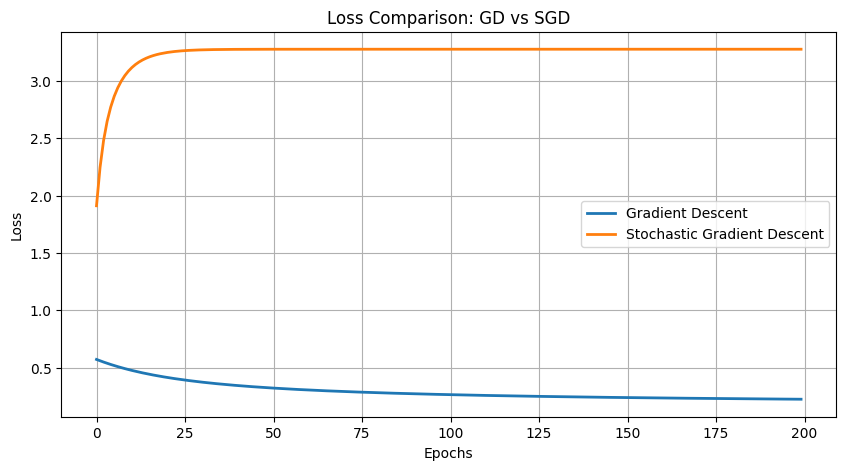

In [9]:
gd_losees=train_gd()
sdg_losses=train_sgd()
plt.figure(figsize=(10,5))
plt.plot(gd_losees, label="Gradient Descent", linewidth=2)
plt.plot(sdg_losses, label="Stochastic Gradient Descent", linewidth=2)
plt.title("Loss Comparison: GD vs SGD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()